In [1]:
#Importing all the required libraries
import xarray 
import os
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
import imdlib as imd
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.io


In [7]:
mat_data = scipy.io.loadmat(r"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\RIDDHI\old_code_summer_internship_may2020\category_rain.mat")
df=mat_data['category_rain']
df

array([[4, 4, 3, 4, 4, 4],
       [4, 4, 4, 4, 4, 4],
       [4, 4, 4, 4, 4, 4],
       [4, 4, 4, 4, 4, 4],
       [4, 4, 4, 4, 3, 4],
       [4, 4, 4, 4, 3, 4],
       [4, 4, 4, 4, 4, 4],
       [4, 4, 4, 4, 4, 4],
       [4, 4, 4, 4, 4, 4],
       [4, 4, 4, 4, 4, 4],
       [4, 3, 4, 4, 4, 4],
       [4, 4, 4, 4, 4, 4],
       [4, 4, 4, 4, 4, 4],
       [4, 4, 4, 4, 4, 4],
       [4, 3, 4, 4, 4, 4],
       [4, 4, 4, 4, 4, 4],
       [4, 5, 4, 4, 4, 4],
       [4, 3, 4, 4, 4, 4],
       [4, 4, 4, 4, 3, 4],
       [4, 4, 4, 4, 3, 4],
       [4, 4, 4, 4, 4, 4],
       [4, 4, 6, 4, 4, 4],
       [4, 4, 4, 4, 4, 4],
       [4, 4, 4, 4, 4, 4],
       [4, 4, 5, 4, 4, 4],
       [4, 4, 4, 4, 3, 4],
       [4, 4, 4, 4, 4, 4],
       [4, 4, 4, 4, 4, 4],
       [4, 4, 4, 4, 5, 4],
       [4, 4, 4, 4, 5, 4],
       [4, 4, 4, 4, 6, 4],
       [4, 4, 4, 4, 6, 4],
       [4, 4, 4, 4, 5, 4],
       [4, 4, 4, 4, 6, 4],
       [4, 4, 4, 4, 6, 4],
       [4, 4, 6, 4, 6, 4],
       [4, 4, 4, 4, 5, 4],
 

In [9]:
df=pd.read_csv(r"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\Rain Category.csv",index_col=0)
df

,zone1,zone2,zone3,zone4,zone5,zone6
0,1,1,1,1,1,1
1,1,1,1,1,1,1
2,2,1,2,1,1,1
3,1,1,1,1,1,1
4,1,1,1,1,1,1
...,...,...,...,...,...,...
105,2,1,1,1,1,1
106,2,1,2,1,1,1
107,2,1,1,1,1,1
108,1,1,1,1,1,1


In [9]:
km = KMeans(n_clusters=9, n_init='auto',random_state=42)
km

KMeans(n_clusters=9, n_init='auto', random_state=42)

In [10]:
km.fit(df) 

C:\Users\ratho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=9, n_init='auto', random_state=42)

In [11]:
values=km.labels_
print([i for i in values])

[1, 1, 2, 1, 1, 0, 0, 0, 0, 2, 1, 0, 0, 0, 3, 2, 6, 1, 2, 1, 0, 0, 1, 2, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 4, 0, 3, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 2, 0, 1, 0, 0, 0, 0, 2, 1, 0, 5, 1, 5, 2, 1, 2, 1, 1, 0, 1, 1, 0, 0, 1, 0, 7, 2, 0, 0, 2, 0, 0, 2, 1, 2, 0, 1, 1, 1, 2, 2, 0, 3, 0, 0, 0, 0, 2, 0, 2, 1, 3, 0, 1, 0, 1, 0, 0, 2, 0, 1, 8]


In [12]:
# labels = kmeans.labels_
# labels
km.inertia_


1.1940765655200862e-29

In [7]:
years_Cluster={
    0:[],
    1:[],
    2:[],
    3:[],
    4:[],
    5:[],
    6:[],
    7:[],
    8:[]
}
yr=1901
for i in range(len(values)):
    years_Cluster[values[i]].append(yr)
    yr+=1

years_Cluster

{0: [1929,
  1930,
  1933,
  1937,
  1940,
  1941,
  1943,
  1944,
  1945,
  1946,
  1958,
  1960,
  1965,
  1970,
  1980,
  1987],
 1: [1902,
  1903,
  1904,
  1907,
  1908,
  1909,
  1910,
  1912,
  1913,
  1914,
  1916,
  1917,
  1921,
  1923,
  1924,
  1927,
  1928,
  1942,
  1957,
  1959,
  1963,
  1967,
  1968,
  1969,
  1973,
  1975,
  1976,
  1977,
  1981,
  1982,
  1983,
  1984,
  1985,
  1988,
  1989,
  1990,
  1991,
  1993,
  1995,
  1998,
  2000,
  2003,
  2005],
 2: [1905,
  1906,
  1919,
  1920,
  1926,
  1950,
  1951,
  1952,
  1953,
  1954,
  1955,
  1961,
  1972,
  1978,
  1986,
  1992,
  1997,
  1999,
  2007],
 3: [1974],
 4: [1931, 1932, 1934, 1935, 1936, 1938, 1939, 1947, 1948, 1949, 1964],
 5: [1901, 1966, 1979, 2002, 2004],
 6: [1922, 1925, 1971],
 7: [1956, 1962, 1994, 1996, 2001, 2006, 2008],
 8: [1911, 1915, 1918]}

C:\Users\ratho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ratho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ratho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ratho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

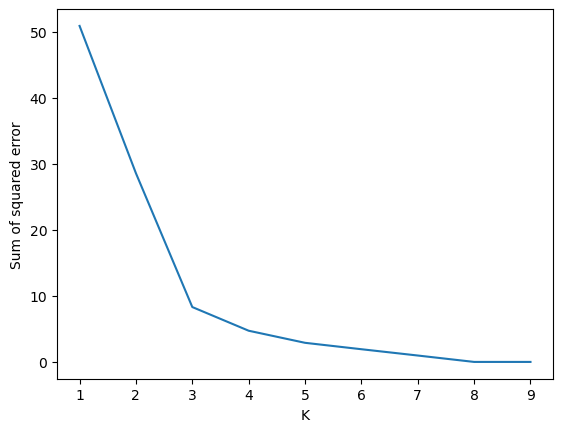

In [10]:
k_rng=range(1,10)
sse=[]
for k in k_rng:
    km = KMeans(n_clusters=k,n_init='auto')
    km.fit(df)
    #Getting sse
    sse.append(km.inertia_)

plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)